Цель проекта:  Выявить определяющие успешность игры закономерности

Описание данных:
1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df =pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
names = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
             'user_score', 'rating']
df.set_axis(names, axis='columns',inplace=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Обработка пропусков

In [4]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Мы не можем определить год релиза игры, кроме того этих данных мало, поэтому можно удалить строки, где значения столбца year_of_release пустые, то же самое в столбце name

In [5]:
df.dropna(subset=['year_of_release', 'name'], inplace=True)
df = df.reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Можем заменить данные в столбцах с рейтингом на средние значения в этих столбцах, заметим, что оценки критиков почти всегда(с точностью до порядка) совпадают с оценкой пользователей, посчитаем среднее в столбце critic_score, заменим там пустые значения средним, кроме того, заменим этим же значением, деленым на 10, с добавленной единицей, пустые значения в столбце user_score

In [6]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Пустые значения в столбце с возрастным ограничением мы не можем корректно заменить

Пропуски могли возникнуть из-за ошибки выгрузки(в столбце name), в столбцах critic_score и user_score из-за того, что игры выпускались давно и оценки в те времена еще не проводились, либо если игру выпустили недавно, то оценки тоже еще не провелись, либо игра не достаточно популярная для того чтобы ее оценивать

Обработаем типы данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обработка столбца user_score. Там присутствует аббревиатура tbd(to be decided или to be determined), она значит, что решение еще не принято, заменим его по такому же принципу, как заменяли пустые значения

In [8]:
df = df.loc[df['user_score'] != 'tbd']

Приведение данных столбца user_score к вещественному типу

In [9]:
df['user_score'] = df['user_score'].astype('float')

Нужно привести к временному типу столбец year_of_release

In [10]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Округлим до одной цифры после запятой значения столбца critic_score

In [11]:
df['critic_score'] = round(df['critic_score'], 1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проверка на дубликаты

In [12]:
df.duplicated().sum()

0

В таблице отсутсвуют дубликаты

Расчет суммарных продаж

In [13]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Количество игр по годам

In [14]:
df.groupby('year_of_release').agg({'name': 'count'})

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Для построения прогноза определенно не нужны данные за все периоды, необходимы данные максимум за последние 5-7 лет

Исследование как менялись продажи по платформам

In [15]:
alpha = df.groupby('platform').agg({'sum_sales':'sum'})
alpha

,sum_sales
platform,
2600,86.48
3DO,0.10
3DS,253.24
DC,15.95
DS,655.36
GB,254.43
GBA,263.70
GC,185.68
GEN,28.35


Выберем наиболее популярные платформы, популярными будем считать платформы, на которых продажи выше, чем 1.5 среднего

In [16]:
mean_for_sales = alpha['sum_sales'].mean()
alpha = alpha.query('sum_sales > @mean_for_sales*1.5')
alpha

,sum_sales
platform,
DS,655.36
PS,714.26
PS2,1171.19
PS3,921.09
Wii,791.91
X360,948.74


In [17]:
data_for_platform = df.query('platform in @alpha.index')
data_for_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16420,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16429,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [18]:
data_for_platform_grouped = data_for_platform.groupby(['platform', 'year_of_release'],as_index=False).agg({'sum_sales':'sum'})
data_for_platform_grouped

,platform,year_of_release,sum_sales
0,DS,1985,0.02
1,DS,2004,17.23
2,DS,2005,128.68
3,DS,2006,114.93
4,DS,2007,121.23
...,...,...,...
61,X360,2012,99.57
62,X360,2013,88.57
63,X360,2014,33.77
64,X360,2015,11.87


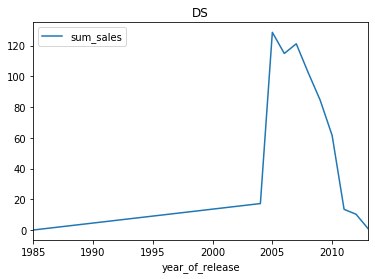

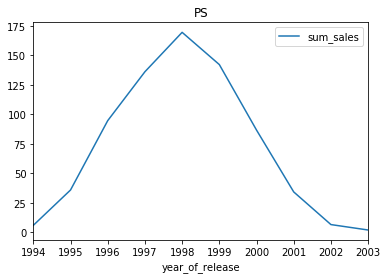

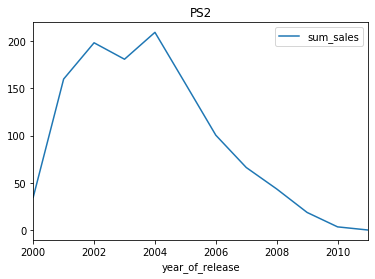

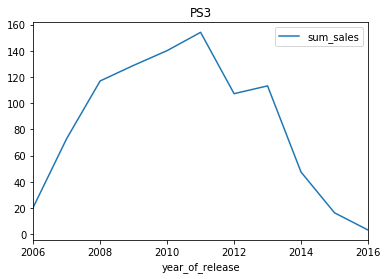

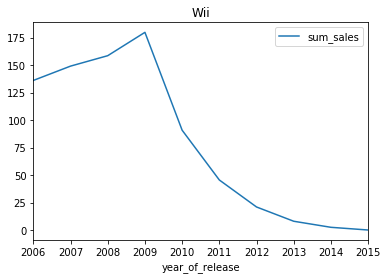

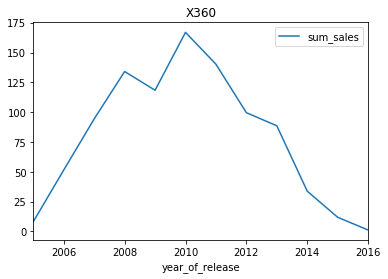

In [19]:
for platform in data_for_platform_grouped['platform'].unique():
    table = data_for_platform_grouped.query('platform == @platform')
    table.plot(x='year_of_release', y='sum_sales', title=platform)
    plt.show()

Исходя из графиков можно сказать, что платформы популярны в течение 10 лет, актуальным будем считать срок 5 лет. В дальнейшем будем анализировать данные только за последние 5 лет

In [20]:
data = df.query('year_of_release >= 2011')
data = data.reset_index(drop=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
3668,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
3669,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
3670,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
3671,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Проверка на то, какие платформы лидируют по продажам

In [21]:
data_grouped = data.groupby(['platform', 'year_of_release'],as_index=False).agg({'sum_sales':'sum'})
data_grouped

,platform,year_of_release,sum_sales
0,3DS,2011,60.53
1,3DS,2012,51.01
2,3DS,2013,56.32
3,3DS,2014,43.07
4,3DS,2015,27.21
5,3DS,2016,15.10
6,DS,2011,13.48
7,DS,2012,10.28
8,DS,2013,0.97
9,PC,2011,34.55


Визуализация продаж

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 2011.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


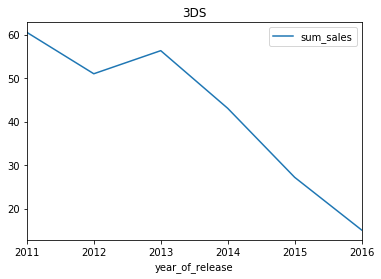

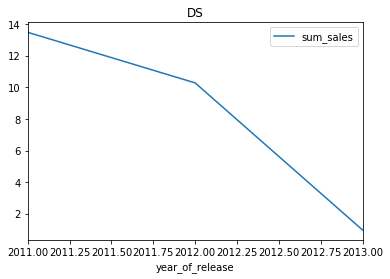

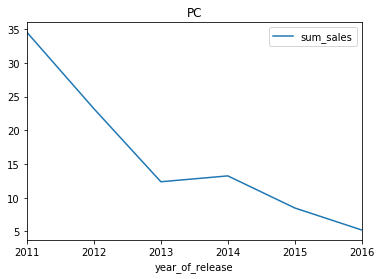

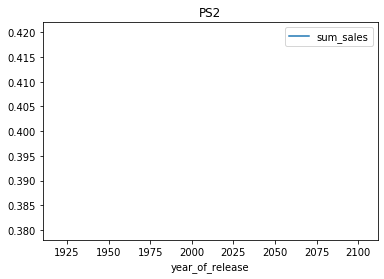

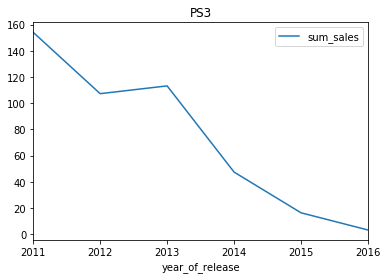

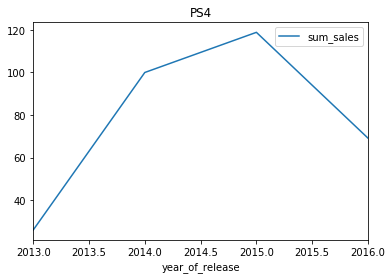

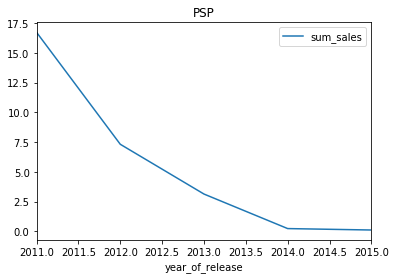

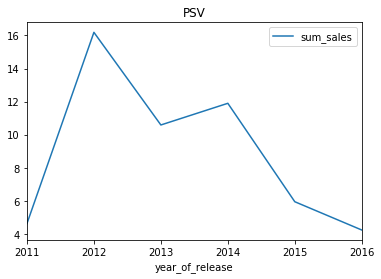

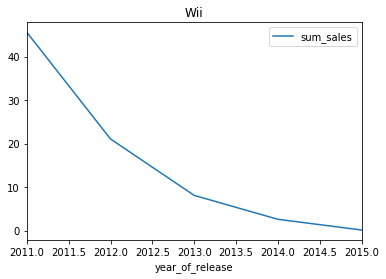

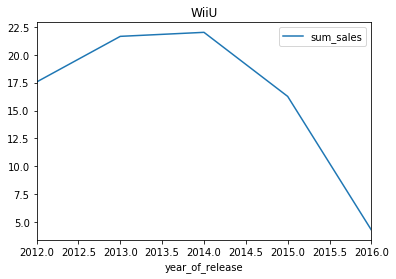

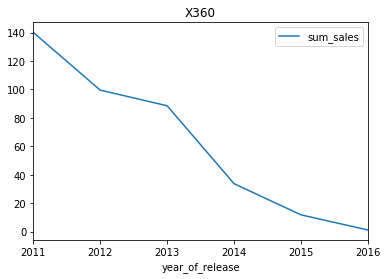

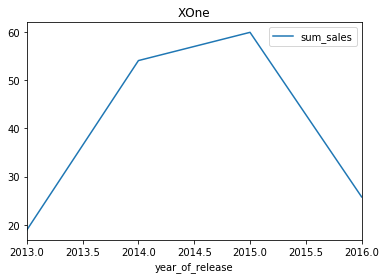

In [22]:
for platform in data_grouped['platform'].unique():
    table = data_grouped.query('platform == @platform')
    table.plot(x='year_of_release', y='sum_sales', title=platform)

На всех графиках заметно снижение продаж, поэтому будем учитывать платформы, на которых суммарные продажи были большими до падения. Потенциально прибыльные платформы ps3, ps4, X360 и XOne

Построение диаграммы размаха для потенциально прибыльных платформ по всем играм

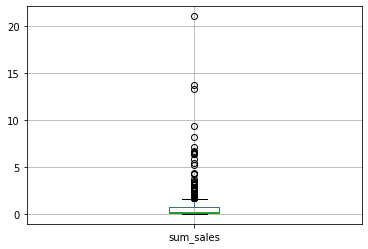

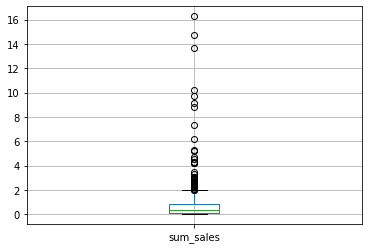

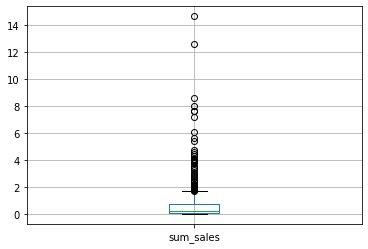

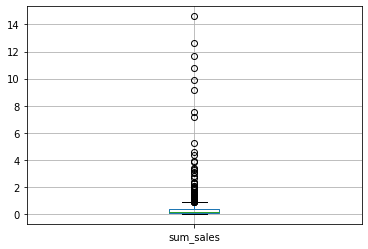

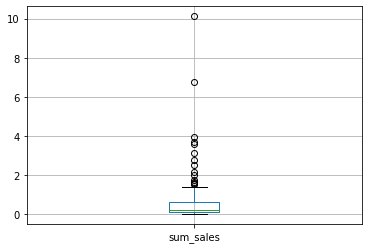

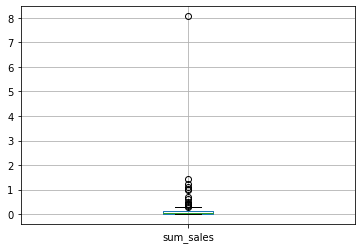

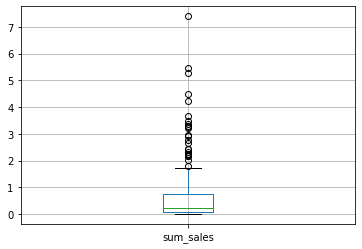

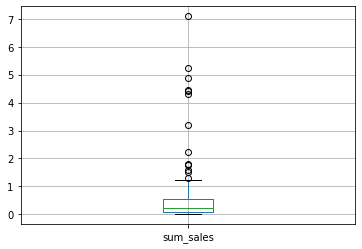

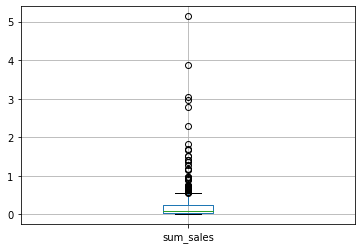

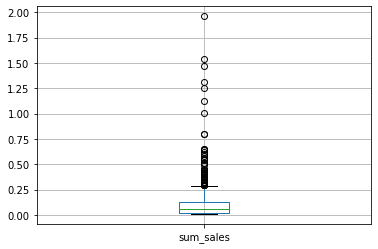

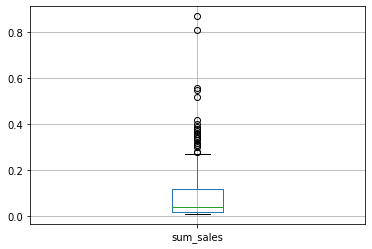

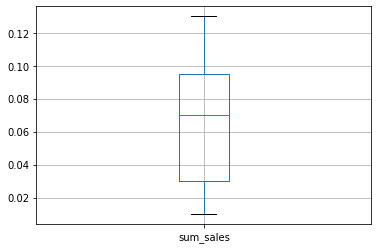

In [23]:
for platform in data['platform'].unique():
    table = data.loc[data['platform'] == platform, ['platform', 'sum_sales']]
    table.boxplot()
    plt.title = platform
    plt.show()

По диаграмме размаха можно сказать, что для каждой платформы есть выбросы, это топовые игры, для которых которых суммарные продажи очень большие. Для прогноза рекламной кампании мы не можем от них избавляться, ведь топовые игры приносят большую прибыль магазинам

Зависимость продаж от отзывов пользователей и критиков

Исследование для ps3

In [24]:
ps3_table = data.loc[data['platform'] == 'PS3', ['critic_score', 'user_score', 'sum_sales']]
ps3_table

,critic_score,user_score,sum_sales
0,97.0,8.2,21.05
5,83.0,5.3,13.79
7,88.0,3.2,13.33
16,71.0,2.6,9.36
21,88.0,6.6,8.17
...,...,...,...
3614,NaN,NaN,0.01
3636,NaN,NaN,0.01
3657,NaN,NaN,0.01
3663,NaN,NaN,0.01


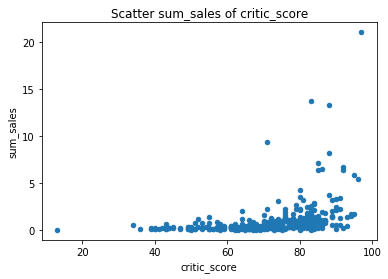

In [25]:
ps3_table.plot(kind='scatter',x='critic_score', y='sum_sales', title='Scatter sum_sales of critic_score')

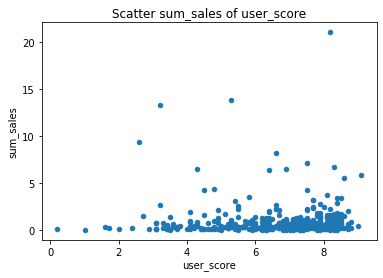

In [26]:
ps3_table.plot(kind='scatter',x='user_score', y='sum_sales', title='Scatter sum_sales of user_score')

In [27]:
ps3_table.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.563315,0.376285
user_score,0.563315,1.000000,0.014089
sum_sales,0.376285,0.014089,1.000000


По графикам и посчитанным коэффициентам корелляции Пирсона можно сказать, что для ps3 продажи в средней степени зависят от отзывов критиков и почти не зависят от отзывов пользователей

Исследование для ps4

In [28]:
ps4_table = data.loc[data['platform'] == 'PS4', ['critic_score', 'user_score', 'sum_sales']]
ps4_table

,critic_score,user_score,sum_sales
3,NaN,NaN,14.63
9,97.0,8.3,12.62
20,82.0,4.3,8.58
23,NaN,NaN,7.98
24,83.0,5.7,7.66
...,...,...,...
3583,69.0,7.5,0.01
3586,NaN,NaN,0.01
3595,61.0,7.9,0.01
3596,51.0,5.5,0.01


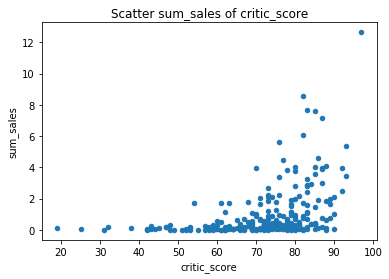

In [29]:
ps4_table.plot(kind='scatter',x='critic_score', y='sum_sales', title='Scatter sum_sales of critic_score')

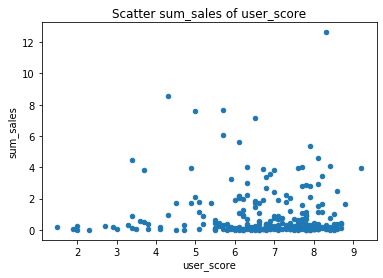

In [30]:
ps4_table.plot(kind='scatter',x='user_score', y='sum_sales', title='Scatter sum_sales of user_score')

In [31]:
ps4_table.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.406469
user_score,0.557654,1.000000,-0.031957
sum_sales,0.406469,-0.031957,1.000000


По графикам и посчитанным коэффициентам корелляции Пирсона можно сказать, что для ps4 продажи в средней степени зависят от отзывов критиков и почти не зависят от отзывов пользователей

In [32]:
x360_table = data.loc[data['platform'] == "X360", ['critic_score', 'user_score', 'sum_sales']]
x360_table

,critic_score,user_score,sum_sales
1,97.0,8.1,16.27
2,88.0,3.4,14.73
6,83.0,4.8,13.68
12,73.0,2.6,10.24
15,87.0,7.0,9.71
...,...,...,...
3578,NaN,NaN,0.01
3600,NaN,NaN,0.01
3611,NaN,NaN,0.01
3631,49.0,2.1,0.01


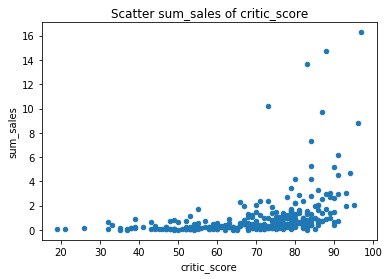

In [33]:
x360_table.plot(kind='scatter',x='critic_score', y='sum_sales', title='Scatter sum_sales of critic_score')

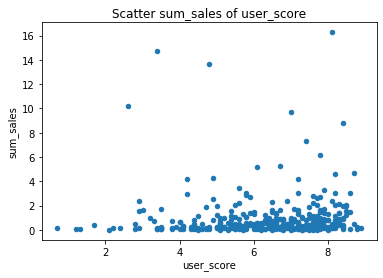

In [34]:
x360_table.plot(kind='scatter',x='user_score', y='sum_sales',title='Scatter sum_sales of user_score')

In [35]:
x360_table.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.568386,0.390005
user_score,0.568386,1.000000,0.038918
sum_sales,0.390005,0.038918,1.000000


Продажи опять же средне зависят от отзывов критиков, и почти не зависят от отзывов пользователей

In [36]:
xOne_table = data.loc[data['platform'] == "XOne", ['critic_score', 'user_score', 'sum_sales']]
xOne_table

,critic_score,user_score,sum_sales
27,NaN,NaN,7.39
44,97.0,7.9,5.47
47,81.0,5.4,5.26
59,84.0,6.4,4.49
70,88.0,6.2,4.22
...,...,...,...
3623,65.0,6.0,0.01
3637,63.0,8.2,0.01
3641,NaN,6.6,0.01
3643,NaN,NaN,0.01


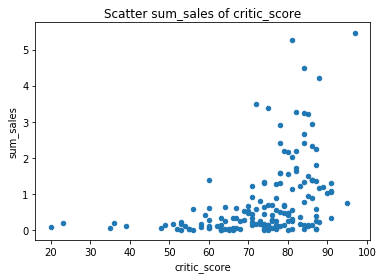

In [37]:
xOne_table.plot(kind='scatter',x='critic_score', y='sum_sales', title='Scatter sum_sales of critic_score')

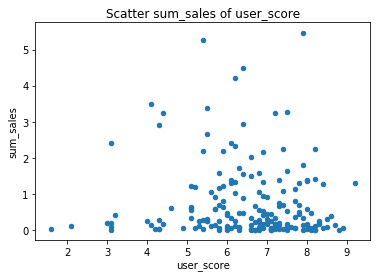

In [38]:
xOne_table.plot(kind='scatter',x='user_score', y='sum_sales',title='Scatter sum_sales of user_score')

In [39]:
xOne_table.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.472462,0.412156
user_score,0.472462,1.000000,-0.068925
sum_sales,0.412156,-0.068925,1.000000


Для этой платформы результаты аналогичные

В целом про все платформы можно сказать, что продажи не сильно зависят от каких-либо отзывов

Исследование по жанрам

In [40]:
genre_data = data.loc[:,['genre', 'sum_sales']]
genre_data

,genre,sum_sales
0,Action,21.05
1,Action,16.27
2,Shooter,14.73
3,Shooter,14.63
4,Role-Playing,14.60
...,...,...
3668,Adventure,0.01
3669,Misc,0.01
3670,Action,0.01
3671,Adventure,0.01


In [41]:
genre_data_grouped = genre_data.groupby('genre').agg({'sum_sales':'sum'})
genre_data_grouped.sort_values(by='sum_sales', ascending=False)

,sum_sales
genre,
Action,546.15
Shooter,402.27
Role-Playing,245.63
Sports,229.89
Misc,119.88
Platform,87.71
Racing,86.20
Fighting,66.78
Simulation,47.16


Самый популярный жанр-экшн, игры этого жанра продаются больше всего потому что большинство топовых игр именно такого жанра, это вносит большой вклад. Самый непопулярный жанр-пазлы. Мало кто производит игры такого жанра и мало кто покупает тоже, отсюда и результат-мало проданных копий

Портрет пользователя для каждого региона

In [42]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
3668,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
3669,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
3670,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
3671,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [43]:
data['rating'] = data['rating'].fillna('nan')

In [44]:
na_table = data.loc[:, ['platform', 'genre', 'rating', 'na_sales']]
na_table

,platform,genre,rating,na_sales
0,PS3,Action,M,7.02
1,X360,Action,M,9.66
2,X360,Shooter,M,9.04
3,PS4,Shooter,nan,6.03
4,3DS,Role-Playing,nan,5.28
...,...,...,...,...
3668,PSV,Adventure,nan,0.00
3669,PSV,Misc,nan,0.00
3670,PS3,Action,nan,0.00
3671,PSV,Adventure,nan,0.00


In [45]:
na_platforms_group = na_table.groupby('platform').agg({'na_sales':'sum'})
na_platforms_group = na_platforms_group.sort_values(by='na_sales',ascending=False)
na_platforms_group.head(5)

,na_sales
platform,
X360,222.92
PS3,166.42
PS4,108.62
XOne,92.77
3DS,80.13


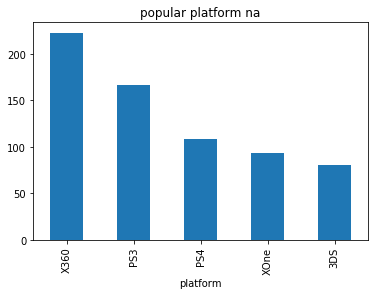

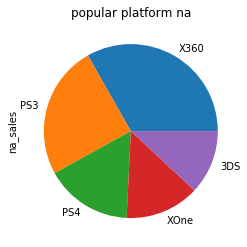

In [46]:
for graph in ['bar', 'pie']:
    na_platforms_group.head(5).plot(kind=graph, title='popular platform na',y='na_sales', legend=False)
    plt.show()


Продажи на xbox360 почти в 3 раза превышают продажи на 3ds

In [47]:
na_genre_group = na_table.groupby('genre').agg({'na_sales':'sum'})
na_genre_group = na_genre_group.sort_values(by='na_sales',ascending=False)
na_genre_group.head(5)

,na_sales
genre,
Action,224.91
Shooter,193.98
Sports,104.34
Role-Playing,83.78
Misc,57.00


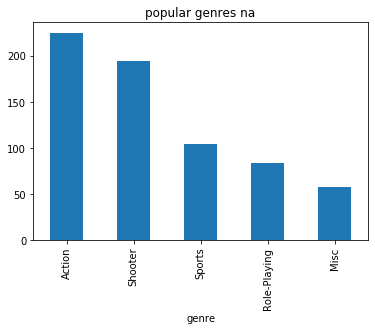

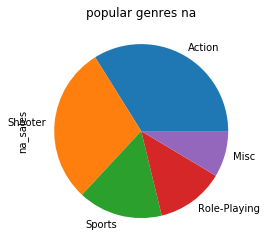

In [48]:
for graph in ['bar', 'pie']:
    na_genre_group.head(5).plot(kind=graph, title='popular genres na',y='na_sales', legend=False)
    plt.show()

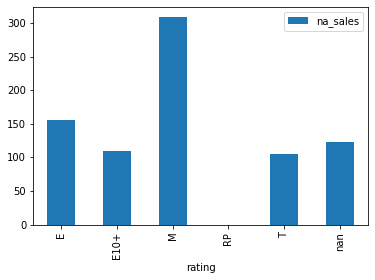

In [49]:
na_table.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(kind='bar')

Портрет типичного пользователя из Северной Америки:
1. Платформа - xbox360
2. Любимый жанр-экшн
3. Играет в игры с возрастным рейтингом M


Исследование для Европы

In [50]:
eu_table = data.loc[:, ['platform', 'genre', 'rating', 'eu_sales']]
eu_table

,platform,genre,rating,eu_sales
0,PS3,Action,M,9.09
1,X360,Action,M,5.14
2,X360,Shooter,M,4.24
3,PS4,Shooter,nan,5.86
4,3DS,Role-Playing,nan,4.19
...,...,...,...,...
3668,PSV,Adventure,nan,0.00
3669,PSV,Misc,nan,0.00
3670,PS3,Action,nan,0.00
3671,PSV,Adventure,nan,0.00


In [51]:
eu_platforms_group = eu_table.groupby('platform').agg({'eu_sales':'sum'})
eu_platforms_group = eu_platforms_group.sort_values(by='eu_sales',ascending=False)
eu_platforms_group.head(5)

,eu_sales
platform,
PS3,161.79
PS4,141.09
X360,116.21
3DS,59.77
PC,56.31


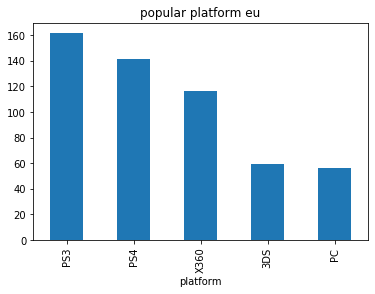

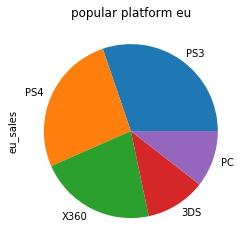

In [52]:
for graph in ['bar', 'pie']:
    eu_platforms_group.head(5).plot(kind=graph, title='popular platform eu',y='eu_sales', legend=False)
    plt.show()

Продажи на ps3 почти в 3 раза превышают продажи на pc

In [53]:
eu_genre_group = eu_table.groupby('genre').agg({'eu_sales':'sum'})
eu_genre_group = eu_genre_group.sort_values(by='eu_sales',ascending=False)
eu_genre_group.head(5)

,eu_sales
genre,
Action,195.10
Shooter,147.87
Sports,86.57
Role-Playing,62.30
Racing,40.18


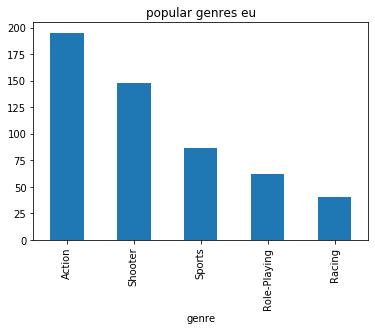

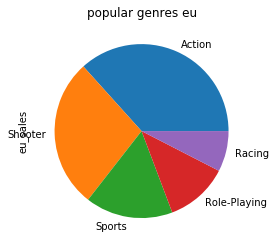

In [54]:
for graph in ['bar', 'pie']:
    eu_genre_group.head(5).plot(kind=graph, title='popular genres eu',y='eu_sales', legend=False)
    plt.show()

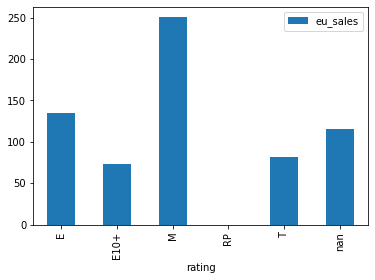

In [55]:
eu_table.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(kind='bar')

Портрет типичного пользователя из Европы
1. Платформа - ps3
2. Любимый жанр - action
3. Играет в игры с возрастным рейтингом M

Исследование для Японии

In [56]:
jp_table = data.loc[:, ['platform', 'genre', 'rating', 'jp_sales']]
jp_table

,platform,genre,rating,jp_sales
0,PS3,Action,M,0.98
1,X360,Action,M,0.06
2,X360,Shooter,M,0.13
3,PS4,Shooter,nan,0.36
4,3DS,Role-Playing,nan,4.35
...,...,...,...,...
3668,PSV,Adventure,nan,0.01
3669,PSV,Misc,nan,0.01
3670,PS3,Action,nan,0.01
3671,PSV,Adventure,nan,0.01


In [57]:
jp_platforms_group = jp_table.groupby('platform').agg({'jp_sales':'sum'})
jp_platforms_group = jp_platforms_group.sort_values(by='jp_sales',ascending=False)
jp_platforms_group.head(5)

,jp_sales
platform,
3DS,100.39
PS3,49.02
PSP,23.86
PSV,21.73
PS4,15.96


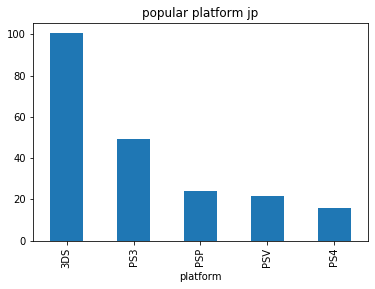

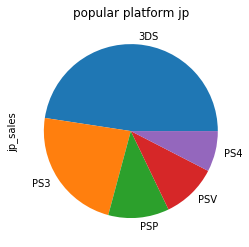

In [58]:
for graph in ['bar', 'pie']:
    jp_platforms_group.head(5).plot(kind=graph, title='popular platform jp',y='jp_sales', legend=False)
    plt.show()

Продажи на 3ds почти в 7 раз превышают продажи на ps4

In [59]:
jp_genre_group = jp_table.groupby('genre').agg({'jp_sales':'sum'})
jp_genre_group = jp_genre_group.sort_values(by='jp_sales',ascending=False)
jp_genre_group.head(5)

,jp_sales
genre,
Role-Playing,79.87
Action,63.14
Misc,17.60
Fighting,12.35
Platform,12.13


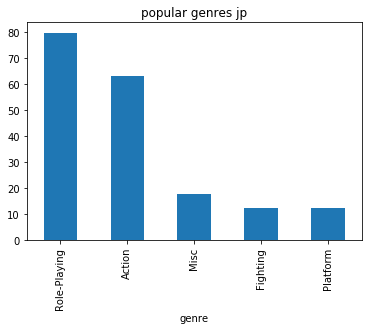

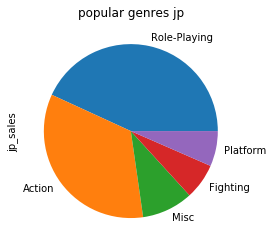

In [60]:
for graph in ['bar', 'pie']:
    jp_genre_group.head(5).plot(kind=graph, title='popular genres jp',y='jp_sales', legend=False)
    plt.show()

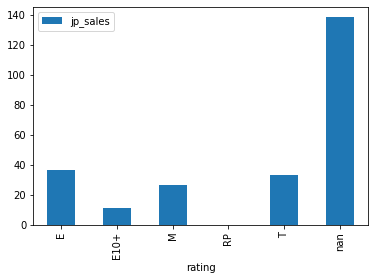

In [61]:
jp_table.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(kind='bar')

Портрет типичного пользователя из Японии
1. Платформа 3ds
2. Популярный жанр role_playing
3. играет в игры с рейтингом E и T, но чаще всего в игры без рейтинга

Для каждого региона необходима своя стратегия по продажама, ведь в каждом регионе разные популярные платформы, либо популярны игры с разным возрастным рейтингом

Формулирование и проверка гипотез
1. Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [62]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,nan,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,nan,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
3668,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,nan,0.01
3669,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,nan,0.01
3670,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,nan,0.01
3671,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,nan,0.01


In [63]:
xOne_user_rating = data.query('not user_score.isna()').loc[data['platform'] == "XOne", 'user_score']
pc_user_rating = data.query(' not user_score.isna()').loc[data['platform'] == "PC", 'user_score']
alpha = 0.05
results = st.ttest_ind(xOne_user_rating, pc_user_rating)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не может быть отвергнута

Формулирование и проверка гипотез
1. Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
2. Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [64]:
action = data.query('not user_score.isna()').loc[data['genre'] == 'Action', 'user_score']
sports = data.query('not user_score.isna()').loc[data['genre'] == 'Sports', 'user_score']
alpha = 0.05
results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается

Общий вывод:
По данным за 2011-2016 год определены потенциально популярные продукты для разных регионов. Определены потенциально популярные платформы и жанры.Проверена зависимость объема продаж от отзывов пользователей.

Полученные результаты по регионам:
1. Северная Америка:
 1. Рейтинг платформ
      1. xbox360 На нее продано 223 миллиона копий разных игр
      2. ps3 На нее продано 166 миллионов копий разных игр
      3. ps4 На нее продано 166 миллионов копий разных игр
 2. Рейтинг жанров
      1. action - продано 225 миллионов копий разных игр
      2. shooter - продано 193 миллионов копий разных игр
      3. Sports - продано 104 миллионов копий разных игр
 3. Пользователи предпочитают возрастной рейтинг M
2. Европа
  1. Рейтинг платформ
      1. ps3 На нее продано 162 миллиона копий разных игр
      2. ps4 На нее продано 141 миллионов копий разных игр
      3. xbox360 На нее продано 116 миллионов копий разных игр
 2. Рейтинг жанров
      1. action - продано 195 миллионов копий разных игр
      2. shooter - продано 148 миллионов копий разных игр
      3. Sports - продано 87 миллионов копий разных игр
 3. Пользователи предпочитают возрастной рейтинг M
3. Япония
 1. Рейтинг платформ
      1. 3ds На нее продано 100 миллиона копий разных игр
      2. ps3 На нее продано 49 миллионов копий разных игр
      3. psp На нее продано 24 миллионов копий разных игр
 2. Рейтинг жанров
      1. role_playing - продано 80 миллионов копий разных игр
      2. action - продано 63 миллионов копий разных игр
      3. misc - продано 18 миллионов копий разных игр
 3. Пользователи предпочитают игры, на которые еще не установлен возрастной рейнтинг, либо с рейтингом Е или Т

Кроме того, была опровергнута гипотеза о равенстве средних пользовательских рейтингов жанров action и sport